In [46]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numbers import Number
import statsmodels.formula.api as smf

raw_data = pd.read_csv('./dataset/Video_Game_Sales_as_of_Jan_2017.csv', usecols=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'])
raw_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## Prepare data

Delete not used columns

In [47]:
# Years in dataset
# min(prepared_data.Year_of_Release) # 1985
# max(prepared_data.Year_of_Release) # 2016

genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',
          'Puzzle', 'Misc','Shooter', 'Simulation', 'Action',
          'Fighting', 'Adventure','Strategy']

# remove all null columns
raw_data = raw_data.dropna() # original 17 416, without null 7 112

train_set, test_set = train_test_split(raw_data, test_size = 0.2)

def get_decade(row):
    if row['Year_of_Release'] <= 1990:    
        return 1980
    elif row['Year_of_Release'] <= 2000:
        return 1990
    elif row['Year_of_Release'] <= 2010:
        return 2000
    else:
        return 2010

def has_numbers(row):
    if bool(re.search(r'\d', row['Name'])):
        return 1
    else:
        return 0

def label_genres(row,genre):
    if(row['Genre'] == genre):
        return 1
    else:
        return 0
    
def get_filtered_data(data):
    #delete null data
    prepared_data = data.dropna()
    #add Decade column
    prepared_data = prepared_data.copy()
    prepared_data['Decade'] = prepared_data.apply(get_decade,axis=1)
    #add Sequel column
    prepared_data['Sequel'] = prepared_data.apply(has_numbers,axis=1)
    
    #add 0/1 to 
    for genre in genres:
        prepared_data[genre] = prepared_data.apply(lambda row: label_genres(row,genre), axis=1)
    
    
    return prepared_data

## Linear Regression - EU sales

In [48]:
data = get_filtered_data(train_set)
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
4740,The Terminator: Dawn of Fate,0,2002.0,Action,Atari,0.20,0.16,0.00,0.05,0.41,...,0,0,0,0,0,0,1,0,0,0
13673,Corpse Party: Book of Shadows,0,2011.0,Adventure,5p,0.00,0.00,0.04,0.00,0.04,...,0,0,0,0,0,0,0,0,1,0
8692,Field Commander,0,2006.0,Strategy,Sony Online Entertainment,0.14,0.00,0.00,0.01,0.16,...,0,0,0,0,0,0,0,0,0,1
635,Resistance 2,0,2008.0,Shooter,Sony Computer Entertainment,1.15,0.84,0.10,0.38,2.47,...,0,0,0,0,1,0,0,0,0,0
7921,Gungrave,0,2002.0,Shooter,Activision,0.09,0.07,0.00,0.02,0.19,...,0,0,0,0,1,0,0,0,0,0


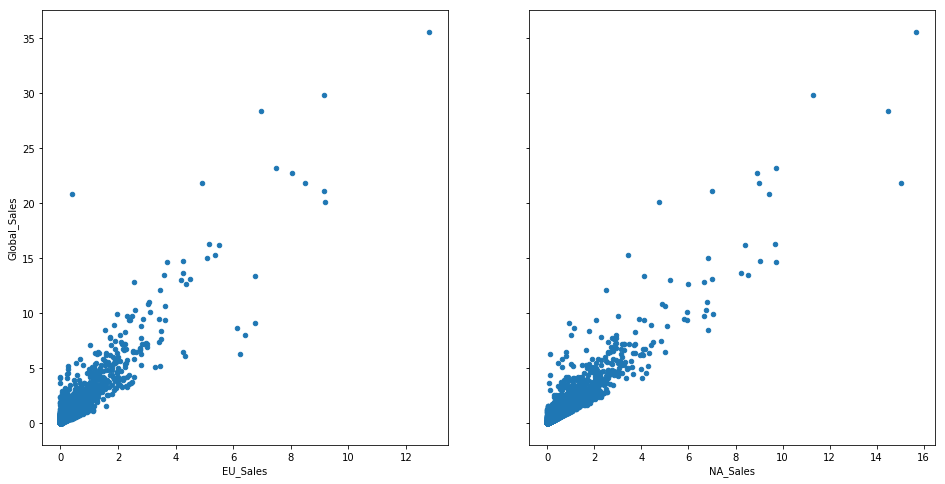

In [49]:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='EU_Sales', y='Global_Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='NA_Sales', y='Global_Sales', ax=axs[1], figsize=(16, 8))

In [48]:
# fig, axs = plt.subplots(1, 2, sharey=True)
# data.plot(kind='scatter', xdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA7EAAAHkCAYAAADo/6g0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3X14XGd95//PfUajkWL5QZGdYFt2UnBysbZ/tilaAlVKk7C0PDgG6jS9GqDdpZDulqRlAdv8ypWG4Gu7jQP0125SaIC0pA1sE7vFiQN0AQeCU+JWJpJqm2xi0sSWbRIiZMdKpNHMnPv3x8zI83BmNDOaM2fOzPt1XUmko3m49ZDzvb/3w/c21loBAAAAABAGTtANAAAAAACgUiSxAAAAAIDQIIkFAAAAAIQGSSwAAAAAIDRIYgEAAAAAoUESCwAAAAAIDZJYAAAAAEBokMQCAAAAAEKDJBYAAAAAEBodQTegUkuXLrWXXnpp0M0AALSIQ4cOvWitXRZ0O8KM2AwAqKdKY3NokthLL71UQ0NDQTcDANAijDHPBd2GsCM2AwDqqdLYzHJiAAAAAEBokMQCAAAAAEKDJBYAAAAAEBoksQAAAACA0CCJBQAAAACEBkksAAAAACA0SGIBAAAAAKFBEgsAAAAACA2SWAAAAABAaJDEAgAAAABCgyQWAAAAABAaJLEAAAAAgNAgiQUAAAAAhAZJLAAAAAAgNEhiAQAAAAChQRILAAAAAAgNklgAAAAAQGiQxAIAQmF8Mq6RE2c0PhkPuikAAEDBxeaOhr4bAAA12Dt8Ujv2jCrqOEq4rnZt3aAtm1YG3SwAANpWkLGZmVgAQFMbn4xrx55RTSdcnYsnNZ1wtX3PKDOyAAAEJOjYTBILAGhqYxNTijr54SrqOBqbmAqoRQAAtLegYzNJLACgqfX3divhunnXEq6r/t7ugFoEAEB7Czo2k8QCAJpaX09Mu7ZuUFfU0cJYh7qijnZt3aC+nljQTQMAoC0FHZt9LexkjOmS9KikWOa9dltrbzXGfErShyT9LPPQP7LWfsPPtgAAwmvLppUaXLNUYxNT6u/tJoEFACBgQcZmv6sTxyVdY62dNMZEJR0wxnwz87U/s9Z+xuf3BwC0iL6eGMkrAABNJKjY7GsSa621kiYzn0Yz/1g/3xMAAAAA0Lp83xNrjIkYY4YlvSDp29bag5kv3WyMGTXG3GOM6S3x3BuNMU8bY352/Phxv5sKAADmQGwGAATN9yTWWpuy1m6S1C/pDcaY9ZI+L+nVkjZJOi3psyWee7e19jJr7bLVq1f73VQAADAHYjMAIGgNq05srT0j6RFJb7PWPp9Jbl1JX5T0hka1AwAAAAAQXr4mscaYZcaYJZmPuyW9VdKTxpjlOQ97j6TDfrYDAAAAANAa/K5OvFzSV4wxEaUT5vuttfuMMX9rjNmkdJGnZyX9ns/tAAAAAAC0AL+rE49Kep3H9ff7+b4AAAAAgNbUsD2xAAAAAADMF0ksAAAAACA0SGIBAAAAAKFBEgsAAAAACA2SWAAAAABAaJDEAgAAAABCgyQWAAAAABAaJLEAAAAAgNAgiQUAAAAAhAZJLAAAAAAgNEhiAQAAAAChQRILAAAAAAgNklgAAAAAQGiQxAIAAAAAQoMkFgAAAAAQGiSxAAAAAIDQIIkFgBY0PhnXyIkzGp+MB90UAADQYoLuZ3QE8q4AAN/sHT6pHXtGFXUcJVxXu7Zu0JZNK4NuFgAAaAHN0M9gJhYAWsj4ZFw79oxqOuHqXDyp6YSr7XtGmZEFAADz1iz9DJJYAGghYxNTijr5t/ao42hsYiqgFgEAgFbRLP0MklgAaCH9vd1KuG7etYTrqr+3O6AWAQCAVtEs/QySWABoIX09Me3aukFdUUcLYx3qijratXWD+npiQTcNAACEXLP0MyjsBAAtZsumlRpcs1RjE1Pq7+0mgQUAAHXTDP0MklgAaEF9PTGSVwAA4Iug+xksJwYAAAAAhAZJLAAAAAAgNEhiAQAAAAChQRILAAAAAAgNklgAAAAAQGiQxAIAAAAAQoMkFgAAAAAQGiSxAAAAAIDQIIkFAAAAAIQGSSwAAAAAIDRIYgEAAAAAoUESCwAAAAAIDZJYAAAAAEBokMQCAAAAAEKDJBYAAAAAEBoksQAAAACA0CCJBQAAAACEBkksAAAAACA0SGIBAAAAAKFBEgsAAAAACA2SWAAAAABAaJDEAgAAAABCw9ck1hjTZYz5F2PMiDHmiDHmtsz1C40x3zbGPJ35b6+f7QAAAAAAtAa/Z2Ljkq6x1m6UtEnS24wxb5T0CUnftdZeJum7mc8BAAAAACjL1yTWpk1mPo1m/rGS3iXpK5nrX5H0bj/bAQBzGZ+Ma+TEGY1PxoNuCgAAyEGMRqEOv9/AGBORdEjSGkl3WWsPGmMuttaezjzkp5IuLvHcGyVtk7Rk2bJlfjcVQJvaO3xSO/aMKuo4Sriudm3doC2bVgbdLKApEZsBNBIxGl58L+xkrU1ZazdJ6pf0BmPM+oKvW6VnZ72ee7e19jJr7bLVq1f73VQAbWh8Mq4de0Y1nXB1Lp7UdMLV9j2jjPYCJRCbATQKMRqlNKw6sbX2jKRHJL1N0vPGmOWSlPnvC41qBwDkGpuYUtTJvxVGHUdjE1MBtQgAAEjEaJTmd3XiZcaYJZmPuyW9VdKTkh6U9DuZh/2OpL1+tgMASunv7VbCdfOuJVxX/b3dAbUIAABIxGiU5vdM7HJJjxhjRiX9q6RvW2v3SfpTSW81xjwt6T9lPgeAhuvriWnX1g3qijpaGOtQV9TRrq0b1NcTC7ppAAC0NWI0SvG1sJO1dlTS6zyuj0t6i5/vDQCV2rJppQbXLNXYxJT6e7sJjgAANAliNLz4Xp0YAMKgrydGYAQAoAkRo1GoYYWdAAAAAACYL5JYAAAAAEBokMQCQMb4ZFwjJ85w/hwAAGgK9E28sScWACTtHT6pHXtGFXUcJVxXu7Zu0JZNK4NuFgAAaFP0TUpjJhZA2xufjGvHnlFNJ1ydiyc1nXC1fc8oo54AACAQ9E3KI4kF0PbGJqYUdfJvh1HH0djEVEAtAgAA7Yy+SXkksQDaXn9vtxKum3ct4brq7+0OqEUAAKCd0TcpjyQWQNvr64lp19YN6oo6WhjrUFfU0a6tGziTDgAABIK+SXkUdgIwa3wyrrGJKfX3drfdTXLLppUaXLO0bb9/AADQXGrpm7RLX44kFoAkKuBJ6VHPVr7hAwCAcKmmb9JOfTmWEwOgAh4AAECItVtfjiQWABXwAAAAQqzd+nIksQCogAcAABBi7daXI4kFQAU8AACAEGu3vhyFnQBIojovAABAmLVTX44kFsAsqvMCAACEV7v05VhODAAAAAAIDZJYAAAAAEBokMQCAAAAAEKDJBYAAAAAEBoksQAAAACA0CCJBQAAAACEBkksAAAAACA0SGIBAAAAAKFBEgsAAAAACA2SWAAAAABAaJDEAgAAAABCgyQWAAAAABAaJLEAAAAAgNAgiQUAAAAAhAZJLAAAAAAgNEhiAQAAAAChQRILAAAAAAgNklgAAAAAQGiQxAIAAAAAQoMkFgAAAAAQGiSxAAAAAIDQIIkFAAAAAIQGSSwAAAAAIDRIYgEAAAAAoUESCwAAAAAIDZJYAAAAAEBokMQCAAAAAEKDJBYAAAAAEBoksQAAAACA0PA1iTXGrDLGPGKMOWqMOWKM+cPM9U8ZY04aY4Yz/7zDz3YAAAAAAFpDh8+vn5T0MWvtj4wxCyUdMsZ8O/O1P7PWfsbn9wcAAAAAtBBfk1hr7WlJpzMfnzPG/FjSSj/fEwAAAADQuhq2J9YYc6mk10k6mLl0szFm1BhzjzGmt8RzbjTGPG2M+dnx48cb1FIAAFAKsRkAELSGJLHGmB5JeyR9xFr7kqTPS3q1pE1Kz9R+1ut51tq7rbWXWWuXrV69uhFNBQAAZRCbAQBB8z2JNcZElU5g77PW/oMkWWuft9amrLWupC9KeoPf7QAAAAAAhJ/f1YmNpC9L+rG19nM515fnPOw9kg772Q4AAAAAQGvwuzrxoKT3S/o3Y8xw5tofSfotY8wmSVbSs5J+z+d2AAAAAABagN/ViQ9IMh5f+oaf7wsAAAAAaE0Nq04MAAAAAMB8kcQCAAAAAEKDJBYAAAAAEBoksQAAAACA0CCJBQAAAACEBkksAAAAACA0SGIBAAAAAKFBEgsAAAAACA2SWAAAAABAaJDEAgAAAABCgyQWAAAAABAaJLEA6mJ8Mq6RE2c0PhkPuikAAKBGxHOEQUfQDQAQfnuHT2rHnlFFHUcJ19WurRu0ZdPKoJsFAACqQDxHWDATC2Bexifj2rFnVNMJV+fiSU0nXG3fM8oILgAAIUI8R5iQxAKYl7GJKUWd/FtJ1HE0NjEVUIsAAEC1iOcIE5JYAPPS39uthOvmXUu4rvp7uwNqEQAAqBbxHGFCEgtgXvp6Ytq1dYO6oo4WxjrUFXW0a+sG9fXEqnodCkkAAFCbesTQesVzoBEo7ARg3rZsWqnBNUs1NjGl/t7uqgMehSQAAKhNPWPofOM50CgksQDqoq8nVlOwyy0kMa30Mqbte0Y1uGYpwRMAgDL8iKG1xnOgkVhODCBQFJIAAKA2xFC0K5JYAIGikAQAALUhhqJdkcQCCBSFJAAAqA0xFO2KPbEAAkchCQAAakMMRTsiiQXQFCgkAQBAbYihaDcsJwYAAAAAhAZJLAAAAAAgNEhigTmMT8Y1cuKMxifjQTcFBfjdAABwHnERtQjj3w17YoEy9g6f1I49o4o6jhKuq11bN2jLppVBNwvidwMAQC7iImoR1r8bZmKBEsYn49qxZ1TTCVfn4klNJ1xt3zMaqlGqVsXvBgCA84iLqEWY/25IYoESxiamFHXy/xeJOo7GJqYCahGy+N0AAHAecRG1CPPfDUksUEJ/b7cSrpt3LeG66u/tDqhFyOJ3AwDAecRF1CLMfzcksUAJfT0x7dq6QV1RRwtjHeqKOtq1dQPnsDUBfjcAAJxHXEQtwvx3Y6y1QbehIgMDA3ZoaCjoZqANjU/GNTYxpf7e7lD8T91O+N1gPowxh6y1A0G3I8yIzUBzIS6iFs30d1NpbKY6MTCHvp5Y4P9Dwxu/GwAAziMuohZh/LthOTEAKJxnpAEA6o94ADQ/ZmIBtL2wnpEGAKgv4gEQDszEAmhrYT4jDQBQP8QDIDxIYstgOQnQ+sJ8RhoAoH7aKR7Qx0XYsZy4BJaTAO0hzGekAQDqp13iAX1ctAJmYj2wnARoH2E+Iw0AUD/tEA/o46JVMBPrIbucZFrnR+Oyy0la6UYGIG3LppUaXLO0ac5IAwAEo9XjAX1ctAqSWA/tspwEwHlhPCMNAFB/rRwP6OOiVbCc2EM7LCcBAABAe6GPi1bBTGwJrb6cBAAAAO2HPi5aAUlsGa28nAQAAADtiT4uwq7i5cTGmF3GmEXGmKgx5rvGmJ8ZY97nZ+MAoJE4Nw8AqsN9E0AQqpmJ/VVr7XZjzHskPSvp1yU9KunvSj3BGLNK0r2SLpZkJd1trf1zY8yFkv5e0qWZ17reWjtRyzcAAPXAuXkAUB3umwCCUk1hp2zC+05JD1hrz1bwnKSkj1lr10p6o6QPG2PWSvqEpO9aay+T9N3M5wAQCM7NA4DqcN8EEKRqkth9xpgnJb1e0neNMcskTZd7grX2tLX2R5mPz0n6saSVkt4l6SuZh31F0rurbTgA1Ev23Lxc2XPzAADFuG8CCFLFSay19hOSfknSgLU2IekVpZPRihhjLpX0OkkHJV1srT2d+dJPlV5u7PWcG40xTxtjfnb8+PFK3woAqsK5eUDliM2QuG8CCFY1hZ0ukPT7kj6fubRC0kCFz+2RtEfSR6y1L+V+zVprld4vW8Rae7e19jJr7bLVq1dX2lQAqArn5gGVIzZD4r4JIFjVFHb6a0mHlJ6NlaSTkh6QtK/ck4wxUaUT2Pustf+Qufy8MWa5tfa0MWa5pBeqazYA1Bfn5gFAdbhvAghKNUnsa6y1v2mM+S1Jsta+Yowx5Z6Q+fqXJf3YWvu5nC89KOl3JP1p5r97q2s2ANQf5+YBQHW4bwIIQjVJ7IwxpluZpb/GmNdImqsE3aCk90v6N2PMcObaHymdvN5vjPldSc9Jur6qVgMAAAAA2lI1Seytkr4laZUx5j6lE9T/XO4J1toDkkrN1r6livcGAAAAAKDyJNZa+21jzI+UPu/VSPpDa+2LvrUMAAAAAIACcyaxxphfLLiUPRpntTFmdfYcWAAAAAAA/FbJTOxny3zNSrqmTm0BAAAAAKCsOZNYa+3VjWgIAAAAAABzqaawk4wx6yWtldSVvWatvbfejQIAAAAAwEvFSawx5lZJVymdxH5D0tslHZBEEgsAAAAAaAinisdep/SxOD+11v4XSRslLfalVQAAAAAAeKgmiZ2y1rqSksaYRZJekLTKn2YBAAAAAFCsmj2xQ8aYJZK+KOmQpElJP/SlVQAAAAAAeKg4ibXW/n7mwy8YY74laZG1dtSfZgEAAAAAUGzOJNYYc4mkM9bas5nPr5b0bknPGWOetNbO+NxGAAAAAAAkVbYn9n5JCyTJGLNJ0gOSjitd2Okv/WsaAAAAAAD5KllO3G2tPZX5+H2S7rHWftYY40ga9q9pAAAAAADkq2Qm1uR8fI2k70pSplIxAAAAAAANU8lM7H5jzP2STkvqlbRfkowxyyWxHxYAAAAA0DCVJLEfkfSbkpZLutJam8hcf5WkT/rVMAAAAAAACs2ZxFprraT/7XH9idzPjTE/tNa+qY5tAwAAAAAgTyV7YivVVcfXAgAAAACgSD2TWFvH1wIAAAAAoEg9k1gAAAAAAHxVzyTWzP0QAAAAAABqV88k9v11fC0AAAAAAIrMWZ3YGHNO3vtdjdLFixcp/cHhOrcNAAAAAIA8lRyxs7ARDQEAAAAAYC5zJrGFjDEXKec4HWvt8bq2CAAAAACAEireE2uM2WKMeVrSv0v6vqRnJX3Tp3YBAAAAAFCkmsJOOyW9UdJT1tpfkPQWSY/70ioAAAAAADxUk8QmrLXjkhxjjGOtfUTSgE/tAgAAAACgSDV7Ys8YY3ok/UDSfcaYFyS97E+zAAAAAAAoVs1M7LskTUn6iKRvSfqJpGv9aBQAAAAAAF4qnom11r5sjHmVpDdI+rmkf8osLwYAAAAAoCGqqU78QUn/IunXJV0n6XFjzAf8ahgAAAAAAIWq2RO7TdLrsrOvxpg+Sf8s6R4/GgaEwfhkXGMTU+rv7VZfTyzo5gAAANSMfg3CopokdlzSuZzPz2WuAW1p7/BJ7dgzqqjjKOG62rV1g7ZsWhl0swAAAKpGvwZhMmcSa4z5aObDY5IOGmP2SrJKF3oa9bFtQNMan4xrx55RTSdcTcuVJG3fM6rBNUsZuQQAAKFCvwZhU8me2IWZf34i6etKJ7CStFfSv/vULqCpjU1MKerk/+8TdRyNTUwF1CIAAIDa0K9B2Mw5E2utvS3388xZsbLWTvrVKKDZ9fd2K+G6edcSrqv+3u6AWgQAAFAb+jUIm2qqE683xjwh6YikI8aYQ8aYdf41DWhefT0x7dq6QV1RRwtjHeqKOtq1dQNLbgAAQOjQr0HYVFPY6W5JH7XWPiJJxpirJH1R0i/50C6g6W3ZtFKDa5ZSxQ8AAIQe/RqESTVJ7IJsAitJ1trvGWMW+NAmIDT6emLc5AEAQEugX4OwqCaJfcYYc4ukv818/j5Jz9S/SQAAAAAAeKt4T6ykD0haJukfMv8sy1wDAAAAAKAhKp6JtdZOSPoDH9sCAAAAAEBZcyaxxpiHdP5s2CLW2i11bRHQAsYn4xRGAAA0BDEHQLupZCb2Mx7XskmtqWNbgJawd/ikduwZVdRxlHBd7dq6QVs2rQy6WQCAFkTMAdCOKtkTu0TSemvt962135d0h6SvSPobSRf52DYgdMYn49qxZ1TTCVfn4klNJ1xt3zOq8cl40E0DALQYYg6AdlVJErtd0oM5n3dKGpB0laT/Wu6Jxph7jDEvGGMO51z7lDHmpDFmOPPPO2poN9CUxiamFHXy/7eKOo7GJqYCahEAoFURcwC0q0qS2E5r7Ymczw9Ya8ettcclzXVO7N9IepvH9T+z1m7K/PONCtsKNL3+3m4lXDfvWsJ11d/bHVCLAACtipgDoF1VksT25n5irb0p59Nl5Z5orX1U0s9raBcQSn09Me3aukFdUUcLYx3qijratXUDhTYAAHVHzAHQriop7HTQGPMha+0Xcy8aY35P0r/U+L43G2N+W9KQpI9lju8pYoy5UdI2SUuWLSubLwNNY8umlRpcs5RKkQBaErG5uRBzALQjY23J03PSDzDmIklflxSX9KPM5ddLikl6t7X2+Tmef6mkfdba9ZnPL5b0otIVjndKWm6t/cBcDR0YGLBDQ0NzPQwtguMCAPjNGHPIWjsQdDvCjNgMtB76YAhSpbF5zplYa+0Lkn7JGHONpHWZyw9ba/fX0rDcpNcY80VJ+2p5HbQujgsAAABoPPpgCItKlhNLkjJJa02Jay5jzHJr7enMp++RdLjc49Feco8LmFa6WMX2PaMaXLOU0UAAAACf0AdDmFScxNbCGPM1pY/iWWqMGZN0q6SrjDGblF5O/Kyk3/OzDQiX7HEB2ZundP64AG6gAAAA/qAPhjDxNYm11v6Wx+Uv+/meCDeOCwAAAGg8+mAIk0qO2AEahuMCAAAAGo8+GMLE15lYoBYcFwAAANB49MEQFiSxaEp9PTFunAAAAA1GHwxhwHJiAAAAAEBokMQCARqfjGvkxBmNT8aDbgoAAHVDfAPgJ5YTAwHhQHEAQCsivgHwGzOxaEnNPgKce6D4uXhS0wlX2/eMNm17AQCoBPGtNs3ebwGaDTOxaDlhGAHmQHEAQCsivlUvDP0WoNkwE4umUY9RyLCMAHOgOACgFRHfqlNJv4VZWqAYSSyawt7hkxq8fb/e96WDGrx9vx4cPlnT62RHgHNlR4CbSdAHihMQAQBZ9YwJQce3sJmr31Kv/hHQalhOjMDljkJmlx9t3zOqwTVLqw56YRoB3rJppdYuX6ThE2e0adUSrbl4YUPel2VLAIAsP2LClk0rNbhmqcYmptTf211xLB+fjFf9nLAr12+pZ/8IaDXMxCJw9Zw9DdMI8N7hk9p85wHd9tBRbb7zQENGV8Oy3BoA4D8/Y0JfT0wbVy2pOP6264xjuX5LWFaXAUFgJhaBq/fsaa0jwI0U1OgqBTcAAFnNEhPafcaxVL8lTKvLgEZjJhaBq+fsaXZfj6SqRoAbLajRVQIiACCr0TGh1N5bZhy9Z67DtLoMaDRmYtEU6jF7Gqa9nkElk9mAuL3g50RABID208iYUC5GM8BaWhhWlwFBMNbaoNtQkYGBATs0NBR0M9pCGAsrjE/GNXj7fk0nzgfBrqijx3Zc07Tfw4PDJ4s6Do1KusP4OwbqzRhzyFo7EHQ7wozY3Br8jgmVxOhGxkRiINC8Ko3NzMQiT5hmM3M1y76eagQ5utrXE2vanwsAoLH8jgmVxOhGxcSw9nMA5GNPLGaFuXLtXCXqm/VM1GqrNwIAEDaVLheuNCbWGtfD3M8BkI8kFrPCXFihVPGDA8debMuS/QAANIt6Fiiaz1E8Ye7nAMjHcmLMCnthhcKlSJJm9+C0Y8l+AACaRT2WC8/3KJ6w93MAnMdMLGa1Qin33KVIjLgCANA85ruFZr5xvRX6OQDSmIlFnlYq5c6IKwAAraMecb2V+jlAO2MmFkVapdgQI64AALSOesX1VunnAO2MmVhUpZ5nqzXinDZGXAEAzYLzSecv7HGdvwGgPkhiUbF6nq3WyHPaOBMVABA0zietn7DGdf4GgPphOTEqUs+z1TinDQDQToh74G8AqC+SWFSknpV+qRoMAGgnxD3wNwDUF0ksKlLPSr9UDQYAtBPiHvgbAOqr7ZLY8cm4Rk6cYflGlepZ6ZeqwQCAdlJr3KPP0jro+wD1Zay1QbehIgMDA3ZoaGher8GG+vkLW3ViACjFGHPIWjsQdDvCrB6xuZ1UE/fos7Qm+j5AeZXG5rapTpy7oX5a6eUc2/eManDNUm4iVahnRcCwVhcEAKAWlcY9+iyti74PUB9ts5yYDfXNgaVRAACUR5+lMvQpgPbVNjOxbKgPHkujAACYG32WudGnANpb28zEsqE+WJyPBgBAZeizlEefAkDbzMRK0pZNKzW4Zikb6gOQXRqV3dsjnV8axe8BAIB89FlKo08BoK2SWIkN9X4rVXWPpVEAAFSHPou3evYpqBYMhFPbJbHwT7n9KdmlUdsLvk7AAAAA1ahXn4J9tUB4kcSiLsYn49q+e0TxpC15HABLowAAaF2NnNWcb5+CY4yAcCOJRV3cd/C44kmbd81rf0pYlkaxvAgAEKSwxaEgZjXn06dgXy0QbiSxmLfxybjueuRY0fWZVKrq/SnNELRZXgQACFLY4pDXrOa23aNackGn1q1Y1JRJIbU6gHBrmyN24J+xiSl1Ror/lG66+rKqAtfe4ZMavH2/3velgxq8fb8eHD5Zz2ZWhLL9AIAghTEOZWc1c8WTrv7r3x4KLJ7PhWOMgHBjJhbz5jWaGetwdMMVqyt+jWbZm8LyIgBAkMIYh7z6AZL0SiIlqXn3mlKrAwgvZmIxb16jmXdcV91optcobjZoNxLLiwAAQQpjHMrtB1zQGSn6ehDxvFJ9PTFtXLWEBBYIGWZi4anavanzHc1slqDNUUAAgCCFNQ5l+wFHTp3Vh+4dyiv22KxJeDPU4QBQG5JYFKm1oMR8qgQ2U9BmeREAIEhhjUN9PTG9+fKLdMd1G5sinpcTtuJZAPKRxCJPPfam1jqy2UxBOyxHAQEAWlOY45Cf8bwes6fNUocDQO18TWKNMfdI2izpBWvt+sy1CyX9vaRLJT0r6Xpr7YSf7UDl5ltQotTIZqVBJ8xBGwCAZhH0Ulk/4nm9Zk/DWDwLQD6/Z2L/RtKdku7NufYJSd+11v6pMeYTmc93+NyOtjHfoDWfvamlRjbPTSe18+GjLNkBAKABWnGpbD1nTyvp6wQ9CACgPF+rE1trH5X084JDtgg1AAAgAElEQVTL75L0lczHX5H0bj/b0E7qcc7qfM5N86owHHGMbnvoSKjOuwMAIKzCeM5sJep5isFcfZ1mOLceQHlB7Im92Fp7OvPxTyVdXOqBxpgbJW2TtGTZsmWNaFtoVTtC6TXCmL02uGapHttxTdUjkJ4jmymraMTRTCo1e40lOwAQXsTmxqllNrBVl8rW8xSD8cm4LulboH03XamXZ1JFfSH2ywLNL9DCTtZaa4yxZb5+t6S7JWlgYKDk41Bd0PJaZmSleS898qowfMvmtdq572je45q11D4AYG7E5saodUlwsxxZV2/1OsXA6+e6cdWS2a+36iAA0GqCSGKfN8Yst9aeNsYsl/RCAG1oOZUGLa8Rxm27RyVZxZN23qOOXhUJF8Y6mr7UPgAAzWI+s4HNdGRdvc236nElP9dWHQQAWk0QSeyDkn5H0p9m/rs3gDa0nEqDltcIY8QxkjWSKl/yW26JU2FFQq+gQ8EEAAC8zXc2sFyyF8b4W9jmWttdyc+1lQcBgFbi9xE7X5N0laSlxpgxSbcqnbzeb4z5XUnPSbrezza0k0pGKL33rbqyNn9FWLlRx1qWOOUGnXLPD2NwBQC0t3rHrnrMBnole/M9Bi8IhW2+5Z1rtX7l4praWunPtZnOrQfgzRQmL81qYGDADg0NBd2MlvDg8Elt3zMqSZpO5N/MYxEj45iSien4ZFyDt+/Pe15X1NFjO66p6CZf7vkHjr3YckcCAGhexphD1tqBoNsRZsRm/46zycbqer1uqfh7yzvXNu0xeF5tlqSeWERJ19bU1nr/XAHUV6WxOdDCTgjGlk0rtXb5Ir39Lx4t+pqV9PBNV2rNxQs9nzvfJU6lnn/k1FmqAQIAQsXPSrb1ng0stZ3otoeOaCY1/5oYfvBqsyRNxtPbn2ppK7OsQGvw9ZxYNK+XZ1KKOpGi6x0RRy/PpDyekTbfJU6lni+Zup3/hrmNT8Y1cuJM6M8NBIBSGnGfq+fZpV76emLauGqJf0uUM8fg5Wqm2OvV5lzzOSe2Xj9XAMEgiW1T/b3dStniwJBybdmEdK4DwudS6vnrViyiGmCDcIg7gFbXqPtcmCrZesXfW69dq1QVNTEaLbfNCzqLB96bqa0AGovlxC2gloIMfT0x3XHdRn30/mElM/E3GjG647q5E9L5LsUp9XyqAfqPQ9wBtLpG3ufCVsm2lmPwgi76lNvmw6fOaue+o6H4WQPwF0lsyM2noEQ2MBw59ZIkq3UrFs8ZDHKDWe7h4NXyqprIPhX/cYg7gFbX6Ptc2GJXJcfgZdWjaFU9kuBsmzeuWqK3rXtVaH7WAPxDEhti9Rht7uuJ6c2XL6vosX5VYCxsD0HJP2Fa+gYAtQjiPhf22OXV/nr0MfzoN4T9Zw2gPtgTG2J+F5TIlRvMzsWTmk642r5nlMJAITPfPc0A0Oy4z9XHfPsY9BsA+ImZ2BBr5Ggzy1BbR9iWvgFAtbjPzd98+xj0GwD4iZnYEGvkaDPLUFsLxwsAaHXc5+Znvn0M+g0A/MRMbMg1arTZrwqMQVc9BACgEu0Yr+bTxwhb5WYA4UIS2wIaVeSg3glzIwpFAQAwX+0cr+bTx2BZNwC/kMSiKvVKmDmvFAAQBsSr+aGaMAA/sCcWgWhkZWUAAGpFvAKA5kMS28LGJ+MaOXGmKcvZU/DBH838OweAIMz3vhhEvOJeDgDlsZy4RTX7/h0KPtRfs//OAaDR6nFfbHS84l4OAHMz1tqg21CRgYEBOzQ0FHQzmsJcFRLHJ+MavH2/phPnR467oo4e23FN0yWJ7Vjt0Q9h+p0DzcIYc8haOxB0O8KsmWNzve+L1carWuIb93IA7a7S2MxMbMjsHT6p7btHFXGMUq7VHdcVj9D6ecB4vZNOCj7UB4fKA0C+et8Xq4lX1c6mZmPr2akE93IAqABJbIiMT8b18QdGlEidnz3/2AMjRRUS/dq/48cSJ2Zi64M9xgCQL6j7YrXVjHNj60zK1Uwyv83TyRT3cgAoQGGnEDly6mxeAitJiZTVkVNn865l9+90RR0tjHWoK+rMe/9OblA+F09qOuFq+57ReRWd2Dt8UoO379f7vnRQg7fv14PDJ2t+rXbnx+8cAMIsqPtiNdWMC2NrPOmqcJNXWLZ9AUAjMRMbKqbk9cIZzXofMF7vZVmcu1d/HCoPAPmCuC9WMwPsFVsLdUc7QrGcmJVVABqJJDZE1q1YpA5Hyl1p1OFIJ37+im7826GiZb7ZIJId/Z1PUKn3siz2cPqDPcYAkK/R98Vqqhl7xdZCzbI1pFySSkVlAI1GEhsifT0xfe76Tdq2e0QR4yhlXf3xteu0c99RzxnNA8derFtQqfcRA+zhBAC0qkpngLOxddvuUcWTxclsrMM0xdaQckkqK6sABIEkNmQKA2OpGc0jp14qCirbdo9qyQWdWrdiUU2BpfC9JWnkxJnZj6tZRsQ5sQCAVlbpDHA2tn714HHd+cjT6og4SiStfvfKS/XBX351yaP0CmNuqZnS+S7znStJZWUVgCCQxDaAH8fSSOmkcUFnxHNGU7JFQSWedPXBr/yrHMfUPCubDcq5o7JTiaSMMerqiFQ148seTgAA0rH15rdcpgsXdOq2h44oGnH01//8rP7D8kVF8dRrVtRKnjOl9z3+nG7bd1SdEaOka2uK/UdOnZVj8mty5CaprKwCEASSWJ/5sU+k8DWvH+jX/UNjee+xbsVizaSKlybNpKyUsvNa6uM1KitZJVJJSdUtI2IPJwAA6di68+GjmklZzaRSkorjqVf83bZ7RJJRPJk/U/rTs9P6k28+KUmaSYfnqmN/+mz6EcWTBScj5CSprKwCEASSWB/5sU/E6zXvHxrTvpuu1MszqbwZzZuuXqPPfvspz9eZz1KfuaopsowIAIDKZFdrnZ1KzLks1yv+RoxTdHhBxDHa9U9PFr1XxDEVx+dsf6MwgY11FB9VxMoqAI1GEusjP/aJlHrNl2dS2rhqSd5jb7hite585OmiACTVttQnG2i9ljDn4mB2AADmlruyaiblKlUQW2dS+fHUa+luyrqSzc9iEymrzoijZOEy35StOD579TcuiEb0hfe/Xm++fFnR41lZBaCRnLkfglr5sU+k1Gsu6Ixo5MQZjU/GZ6/39cR0x3Ub1RV1FIukA1xX1FGsw+jDV62p6n33Dp/UL/3pfv3WFx/XO//XAV0/0K+uqKMFnZGix3IwOwAA5eWurDoXTyqedGUlRXLyUddKjx17cfbxYxNTuuWda9UVdbQw1qGuqKM7rtuoO67bkHft1mvXeq6VuvXatSUTzfHJeF4/wqu/4cpq3YpF9fj2AWBemIn1kR/7RLxe8/rX92vznQc8993mLvFJJFP6hydOafehE7r70Wd01/eOVbRHd3wyro8/MKJE6nxy+rV/OaFv/sEva/jEGX3qoSOajKdmvxaWg9kBACin3oUZc3nNdBaWskhkalicm05q58NHZ+P8R996uS68oFObVi3RmosXSlLRct6FsQ5t3zOqiDFKpFzdeu06vfeKSzzbUqp+B3tdATQrE5ZZs4GBATs0NBR0M2riRxDMXdq7+c4Dmk6cj3xdUUeP7bgm773SxRmKz6HzemyhR596Qb99z78WXb/3A/9R61Ys1uDt++d8fwBoNsaYQ9bagaDbEWZhjs1z8aMwY67xyXhR/PSS3sJjNVMQv3tikTkrDlfS//BqR24c9zORB4BClcZmlhM3QF9PTBtXLal4CU+lr9nf263hE2fU4XiXvs99/XRxhuJA6fXYbFuyH5/M+Xqul6aSszPDucuYmmGktpafKQAg3Op17y9c6judcLV9z2jdYko2MfzoWy9Xxxw9sUTKVWfEFF2fjKfmbNdc/Q/p/Ixwrty+QSWv4YU4DMBPLCcOSDaAHT55Nm+JkNeIqtcoaHaEOGKMXp5J5T2+cN9tuWrCuY/NHXWeTqZkrVV3tEPTyaTn97CoO/3n02xVCf0ePQcANJ963vv9KMyY287tu0fkulLCtYp1FBdgkqQFsYhSrtUt71yrnQ8fLfl6pdpV6QyqH/U7iMMA/EYSG4Dszb3DMbN7SUsdweMVCAbXLJ0dIc6VDXiFM6FeAUqSYh1m9rHeZ79K5+LeCWw0YrRuxeLZz5ulKqEfxxo1K5Z4AWg1td7X6n3v9yOxy7bzY/cPK3dhVO4qqQWdEaVsOnFdv3Lx+Z+DkT75j4c9X9OrXZUmkbnFogoH1Ot5FGCrxmEAwSGJbbDcm7uX3BHVUoHgM9dtlFNwKNyCzohuu3adrn7tRUVBorAY1EzK1U1Xr9ENV6wue/ZcrljEKGmllJveQ22t1WPHXmy6kVU/R8+bCaPcAFrNfO5r9b73+1GYUZKOnHpJHjt7JKUHokvF8fHJGc/ndHqc2VpJEjk+Gdd9B4/rrkeeVmckfWzeLZvXav2KxfMeGG2XOAwgWCSxDTZXsjiTOj+i6vVY61p99P5hzaTyC3IlXVcXLSodHOZa8ltqtnaWkSKSsguXk25zjqz6NXreTBjlBtBq5ntf8+Pe789WmdLFNFOuLZHAxnXXI8eKHh+NSN+4+crZ6sRZR06dlWO8a2X09cSKCj3GM1uGdu47WpeijO0QhwEEj8JODTZXsnjT1WtmA4jXY+MpW5TAOkoHvw/f94QGb9+v+x5/zrOYQrniDIUFmqIRow5Hs8Wabrr6MsU68s+ELSwK1QyatdBUPc1VhAMAwma+9zW/7v21FjXyko3JXoWcYh4zqlljE1PqjBQ/6Q+uubwogd07fFIfundIr5SolVFNocdatUMcBhC8tpqJbYY9hNmb+zaP425iHUY3XLG66LHZ5UzxZEpWyjuvVZJcSa57fv/qJ79+2LP0/lzff+Gos6S8j+/6Xv5IcLOOrDZboal6Y5QbQKupx32tkff+avsT9z3+nG576IiiEUfGGBnZ2TnZDsfoj69dW3LpdKnB7wsXdBa1KZ2g5vcRchPkkRNnKir0OF+tHocBBK9tklg/9hDWmhRnb+5fPXhcd+bsR8kdqcy+9uCapXpsxzUam5hSIpnSdX/1eEXvkS0YlV2OdeDYixV9/4UFmnI/DtOh581SaMoPfu3VAoCg1HpfK4zDjbj3Z5fjRhyjlGt1x3Xl+xP3Pf6cPvn1dFGmmVSq6OtJ12rnvqO64tIL9fJMqqhP0dcT0y2b1xYVdtr58FG9bf2ryta2uCAa0Rfe/3q9+fJlkior9FgvrRyHAQSvLZJYP/YQzjcp7uuJ6ea3XKYbrlhd8vicwtceOXFGsYhRPFV6T02hqOPoyKmX6vL9M7LaPPhdAGg11d7XgihwNz4Z18cfGMlbEfWxB0Y84+n4ZFxHTp3Vpx46UtFrv+MvfqBYR8Tze1m/YrEWdEbyjtQrLJbklaC6slq3YtHs55UUegSAMGiLJLbelfLqmRQXjlR6vfbHd49q7fJF6u/tlnGMVEUSO51M6aWpmbp9/4ysNg9+FwBaTaX3taAK3B05dbZoS08iZXXk1Fm9+fKLZq9lE2zHmKLHe8meWDCTSm8LKvxeFnRGlHAL3rdg+W/udqXsLLHX7CqDoABaQVsUdqr3HkI/C+t4vfZM0tU7/uIH+tbhn+rDV61RrON88aWIKfFCGUZGH3tgVFOJ/PNe2UMJAAir4ArclQq656/nJtiFBZayHCNFTLp4YmeHo1jEu5qwlE6IN995QMamk9iuqKOuqKNbNq/V2MRUXhFHm/23Pf+Zl3oWrAKAILTFTGy99hBm996kR0TnnxR77akttV9lJmX1ya8fVnfUkbWubnxzevnPD38yrpu+9kTJ95hJpV8rGjGKdUidkYhmUq4+fNWaqtoKAEDQ6h2Hq7VuxSJ1OMo767XDkVYs7tLIiTPq7+2e8yg9ScpOqr517UW64Q2r9b57/iVvlVX2ezn2/Dlte2Ak71SCVMrVtl97rXbuO5rXpxlcszSnsFN+XQySVQCtpi2SWGn+y2cK995cP9Cv+4fGak6KS+3lySbcH989qhmPEvhTmSVHf/7dp/IqGc+lqyOiu977Ov3zT8b15QPP6Avf/4nu+t6xhuwhAgBgvmqNw/U8maCvJ6bPXb9J23aPKGIcpayr3/yPq7T5zgOz7bjlnWuLEuxoxCjimNllw1n/8MQpPfxvp/WuTSv09SdOKRpxlLLpZcAHjr2obbtHi47VS7jS7d96UimrvKXUd79/oK5bpwCgmbVNEivVvofQa+/N/UNj2nfTlbOVBCXNjsKWeo/cEeRSe3kk6ZK+Bfrq775BN3zpYFHwykq60pd+8IzueezZir6HhOvqx6fP6Qvffyb9eaq2UdpmOKYIANBeKonDXjGp2uJPhTHOK+ZlB8WPnHpJL00l9LEHhhVP2tl27Xz4qG7ZvFaffujo7N7UP968VrftO+r5nvGk1f1DJ2f3vd567VoNrlmqwdv3ew5mS8WlMdJLqy3HrwFoG22VxM6lVIJWqjDUyzMpbVy1JH3+276j6oyYorNZs3IDaTzlzu5tyX29+w4e119+79hssL106QV66vmXS7b37h/8u1Kud5IbMVJHxFFnJP1aH33r5brjn/6vx+OMjpx6SYu7o3MmpvWuBElCDACoRLk4nF3CK+UfC1euUGLvgs45TwbwmunNxrzssXWOMUXnskYdR+OTM0rvTTWSrBZ2dejjb71cf/LNJ0t+j9nKwzv3HdWq3gvmXJKcK+G6Wrdicd2OXyM+A2h2JLEZ5RI0r32qM6mUzk7N6O7v/2Q2KM1kaicVzm56BdJCMylXdz3ydN5obrkEVlLJBFaSPv3u9XrbuldpbGJKh0+e1W0PHfGskDidSOlD9w7NJrulEtP5VoIsDIhBHI0AAAinUgUaH39mXJ/99lOeg8heie9M0tWv/X+PynGMunKOs8nuJ82Ncff+8Lgkea6Yyj7Wy0wqpbseOZa3N/VjD4zIMVKnI83MkZeWmlUt55Z3rlVfTyxvlliyWrdi8exjKk1Mic8AwiCw6sTGmGeNMf9mjBk2xgw16n3HJ+MaOXEmr5pfboJ2Lp7UdMLV9j2js4/J7lPtiqarAnc46aIMv3/fjzxHVSOOyauQ6FUtscMxikaMFsY61BV1dNPVa8oVEqxYNCL90dtfq/WZwNXf262dDx8tuSzZGCme9P6+c82nEuTe4ZMavH2/3velgxq8fb/ue/y5sj9vAAByFcbhrqijLRuW639+80nNJF1NxlNFsaRUocSUTR+Lkxt/jpw6WxTjCkVMOraXinsRR4p1OLrp6svUGcl/rUTKKp60swlsxEidEaMFnZGi18mdVe2KOop1lG/XglhE61cunu3ffOvwT3Xj3w7pw/c9ocHb9+vB4ZNFcfjB4ZOerzVXfwgAmkXQM7FXW2tfbNSblRpdrOQc2dzRzQ/dO6R40p3dV1ookbKze1DGJ+M68fNXikZsk65V1JFufPOrdcMVqzXx8ow+++2nqvp+cpcMZw8sv3BBp3Y+fL5i4YevWlNySVLESLGOiJJlDk/PqvWYIq8Z3NseOqLODu+EmGVLAAAvuQUaF3RG9I6/+EHRY7KDyNkaGOUKJWalk1cz58znyzMpHT51VldceqHnLGzKlSLG1YULOud8rQs6O3TXe39Ri7ujOnzqbFGl4dxZ1R/+5EXd9LXhkq+VTFl96/Bp3fPYs+pwzOyy5GzM3bZ7RJJRPJm/kmrt8kVF+4kr6Q8BQDNoi3NipfKji/293UXnqE4lkkUJWl9PTIu7o0UjrIVuvXbt7JLZwdv3a/vuUc/HJVzpru8dkySdOjtV9LqFZ8C+8Rd68645jtEHBi9NVx3+xDW64YrV2vnw0bzv8c5HjmmmRLLd1RlRIlVZYuo1Cl7JXhvPGdyI41FtkeITAIDysuebvjyTUtQjFucOIkvpxPcbN1+pzjKHqqdnPhcVxbjrB/qLHrtz31GdOjutaIluwExK+vS+I7pl81qVm0CNJ1N65meTWtAZ0XuvuET7brpSt167VvtuujJv6W5fT0ybN67Ub78p/zQCJ3PGbDRilEy5+vz3n1E86c4msLkixlHEyf/+rWv1jv91oGhmttYBawBotCBnYq2k7xhjUpL+ylp7d+EDjDE3StomacmyZcvm9WblRhf7e7tljFHuet7058VKLU+6IOoo6Vrdeu06vfeKS/KS5nIixuiz/+f/avehsaLELhJx9IE3XqK//uGzikWMhp6byKtImEhZff77z+iex/5dd1y3UZf0LSh6fWOkD191me7M7LfNlcq0N3fmtlxiWssxRV4/r5RNV1/0GnkGADS3esbmWvX3ditli7fJZAeRc625eKE+8xsbZwseTSWSMiZ/T2zuzGc2xo1NTOkb/3Zak/H81Uo//MmLKhfa40mrsZ+/oojjKFkQ/xZ0RjSVSGkmZfWph9LViq9c06eh5yYUdRzNpFK66erLdMMVq/OqI//hWy7Xb7/xUg2fOKNNq5aod0Gnjpw6qw/dO6TEHFuRUtbNFJjKaWPKSrKzM9S5NS7qVRwKAPxkrEcQaMgbG7PSWnvSGHORpG9Lutla+2ipxw8MDNihodq3zo5PxjV4+/68pLIr6uixHddobGJK7/vSQZ2Ln5+NXRjr0N998AptXLWk6LUeHD6Zd4O/ZfNarV+xOC+xGzlxpug1qxWLmEygmVtX1NHffeANuu6vHi/62nf++5vVu6BTXz14XHc+cqyoiJPfVQgLf16Nel8AKMcYc8haOxB0O8JsvrF5PrKxJWKMEik3PYj8xktKPj435kiaM/549Rs6I45Srlt0xE2haMSoM+LkzYwuiEX0+7/yGt3xf+beOhSNGL3ndSv04MhpOUoXf9z+a6/Vjb/ymtnHzNXPWBCLKJUpdiVpNg7Hkyk5BWfWFvZ5iM8AglJpbA5sJtZaezLz3xeMMf8o6Q2SSiax8zXX6GI1y2cqmZFc0BnRKzO1J7CSKk5gpfTo8Oe+/XTR9VgkvT9mzcUx3fyW9OhuYbtrPT+3UqV+Xn6/LwCgdVW7Oqgw5pR7fDaJu2Xz+VVDryRSmklVVjHYMSpa2ptyrRbEKut2JVLps2Nz/ck3n9ThU2f1u1e+Wv293SVXhsU6HP3x5rVavzJ/cD13P/HmOw/kv1+mz5ObvHoN4gNAswgkiTXGLJDkWGvPZT7+VUmf9vt9yyVT17++X/c+fnz2sdcP9JcNcOUSsL3DJ7V99+icI7X1FE+m9M/PjBddt8rfHxRU4kjCCgCoNz9iS2ERyFveuVaLu6O66WtPVPwahdt3JOmWzWt1xaUXzqttD46c1nd//IJSNj3Dmjs4X7gUuVDuz8prUD979i1H6wAIg6BmYi+W9I+Zfacdkr5qrf1WI97YK+CNT8Z1/6GxvGv3D43pD99yuedjy436ZvfCxstUQqxFrMPItZK1Vp0RR9MJVyZTXThlXW3+f1ZozxPFJfOv3bCyotFmlgwBAIIWdEzyqqi/8+GjuvnqNfN63QWdEa1fsVhHTr+k/Aoc1cvO8G7fM6rHdlwzuy2qmp9Z4aC+pNml07WcBQ8AjRZIEmutfUbSxiDe20ulJeUrOQDc67XqwVrpm3/wyzr47z/XbfuOKprZL5t0rYwxWtjt/au8+rUXlXxNDjQHADSLZohJpWL4n32nuiPwCqWs1YLOiLbvHq3HkfCSzvdTNq5aUlOimTuoP3LiDEfrAAiVtjlip5xKSspXegB4qT0q8xXriOjU2SntfPioZpLu7H7ZmZSreNLVVw8+p0hBReWIMXrTa/o8X+/Y8+e0bff8DjTPHqzOIegAgPmoNMZW83qPPvWCHn3qZ2VfIzeOjU/GdXYqUbTvdTrhymtxlVP61J48ESe9fHf3j8YqWqXV4RgtiEUULXMskFTfo284WgdA2AR5xE5gCpcr9fXEdMvmtbrtofQMZ7aaX+7oY6WztYUFpF6ZSXkeA1CtdHAxJWd5Z1LSf3rtUj3y1ItKuen3M8bqsWMvzlYCPnLqJUlWJ34+pdseOlJ0pE81o67NMGIOAGgNlcbYSuwdPqmPPzCiRCbGdTjS567fpME1S3Xk1FlJRutWLMrbAzqdTMl1rbqiEaVcN11duMPRTNKVkfLiZazD0Wd/Y4MWdXfqg1/516JYWsh1pZ+8MKkvfP+Zitr/vz90hV5JpPShe/OrPkeM1BFx8k4YkNKzqPNdfs3ROgDCpu2SWK/ky0qZ6oNGiWS6TH9hQlbNKOXgmqW6+/2v18mJKf2//3i4Lu3esnGF1q1YpKlE6YrH33nyZ3mfJ11p2+4R/fj0S7r70WfmLDRV6air154h9s4AAGpVr5nA8cm4tu8enU1gpXQs/O9/PyzHMbPXHUnGkVKu8hLn7H7TiEmfodoZMXp5Jr9dxkhves1STbw8M2cCK6X3v/75/mMVtf/6gX4N/EKfRk6cUWckonjyfMy/oLNDd733F7W4O6r+3m4dOPaiBm/fX7fB5FrOggeAoLRVEuuVfG3bPSrJ5lUS3PnwUb1t/avKzrDOpFx9+KriQg+5SfJ0MlX09VrtPjSmN19W/aHy8aTV5ysY/e3scCoeda3niDkAAPWaCRybmFLEY51vykqpnITTnf2Xt+zjEwVJakdmaXBfT0xjE1NVnec+l3dtXK5d16XLhZRK6tetWKS+nphvg8mcJAAgLNoqifVKviKOkayRdD7hLJWQZUcp7zt4XHc98rTufvQZ3fW9Y7Ojn15BpVqOkVyPeOha6WP3D3vuy5mvzojRN26+UmsuXljR49k7AwCot2yMzV3yW63+3u7ZLTV+cIzR2uWLzr9XHbYLZf3T0ec1PhmfTSTLJfUMJgNod22VxHolX+lglx+E5krI/vJ7xxRP2tllPtnRz7GJKXUUjABHI6ZoJLeccrG3XqO9WQs6I7Nnza25eGHFRxuwdwYA4Idqzir1ill9PTH92rqL9eDIaV/aN5Oyesdf/ECf+Y2NWrG4S3XMYYuS0GXSfocAABoYSURBVHLLexlMBtDu2iqJlaQPX7VGdz5yrKgwQqUJmedsrjEam5jS/h8/r8l4/hJia6WoI0lGCR9Hh6sRjRh9ass6rV+xeDYw3vf4c7rtoSOKRpzZxLbc3hr2zgAA6unY8+e07YERzaTsnEtks1t3IsYokUrXsnjvGy/R+GRc3zj8U1/bOZOy+sjfD5cddK6FVxJaankvg8kA2l3bJLG5e1Ulqxvf/GrdcMXq2Rv+XAlZdsR3QWekaPTz5ZmUPv3QYR06frboecnZKBdcArsgFlEyZfWBwUv1ptf0ad2KxbPf4/hkXLd/88ez+2ZnUucPUZ9rbw17ZwAA9bB3+KS27R6tqGp+7tadrE9+/bDGJl7Rm17Tp1jEKFlm5VLUkWSMOhxHU4naalfUK4HtcNJVkL1ORZgLg8kA2llbJLFee1Xv+t4x3XDF6tnH5CZkucfRrFuxuGh505aNK3T/0Fjee3glsNXqjJiKKh1WozvqaNuvXq5rN64sCnD3Pf6cPvXgYSU89tlmZ5cJigAAP2Vj9IxH0Qev2cmxiamic9El6fPff0ZfPvDMnAlmypUijpXbBKujkq5VR2Zb07nppB596mfK9j0qib8MJgNoV22RxFZTAGHv8Mm8AkrRiJG1VsmcMvxfHz6lBZ1OUdn9+ap3AitJUwlX//ObT+rCBbHZ5cHjk3F96QfPlK1anEixtwYA4D+vGC2lB3YLZyfHJ+M6OzUzexROocLLRtKvrb9I3zn6s9mVUa7SZ7eWLU9coDNiZJUe4I0n3bqurZrOdDg++fXzR/JFI0af/Y2NnL8OACW0RRJbaQGE8cm4tj2QXwHYqyhTNGI0U+MSJL9EI0Yfectl+rPvPJ2zhDktnrT6+O5RrV2+SEdOv6Ttu0cVn6PM8a3XrmN0FwDgO68Y3dnhFFXNz90HWykr6Z8OvzDvpDOZsnIco+mUD0cEeEikrLbt5vx1ACjFCboBjZAtgNAVdbQw1qGu6PkzUccn4xo5cUbjk3Hdd/B40Siul3gipV//xX7/G16Fzg5HC2IRdXZ4/0pnkq7e/ueP6uMPjJRNYDsjjv7He9brvW+8xK+mAgAwyytGf+a6DXkJbO62oFKzsKXUY9bUGFM0QDwfXdG5u18RJ72tBwBQrC1mYiXvAgh7h09q++5RRRyjlGuVLDHCGo0YGaX3rrhWSrrS3w+NKWJM0RlxKxZ16tRLM3Vte2fE6DcGVunrT5wsvYQq6epPvvHjskl4eu9r6SD8337l1frgL7+aUV8AQEPNVaSo1JLjRrF1XEAcjRh95rqNOjuV0M6HjypijGdsT7mWbT0AUEJbzMR6GZ+Mz85KvjKTUjzpymtLaodj9FtvWCVrbVGxCK9DzuudwErpvbK7D40pniwOchd0RtQZMXJdW9Escin/7apXa8fb/wMJLAAgEH09MfX3dmtsYkrjk/G8r3ktOW6kWidhL4gWL302Mvr47hHJSHe///X6/Pter//xnvXKXUgVjRjdcR1H5gBAKW0zE5t7xM7/396dR8lZl4ke/z5VvYQkECBsJiGyJSJEEzASkUnuCMJBg8CMCgiu6PHOHFmuB1nU6zg69zgMDJfBIccZVARHhOGCXrnIZZFFXJEtCTvkQoQOCCYGZMnW3c/9oyqh06kOWar77bfr+zmHk6q3qt73+TXd/fTz/rY1vb186t17NJzv2t+/f/RAPnfl/Q1X8B1Kq7p7aa8GnW3QUa1t8/OVufux7NXVXHzbog0K6tHtVb5y1Fv56nUPrbdgVDXYoFjvbKvwmb/YayiaIUlSQxvbr3ztkOMzN2FNh+Gk0d8Oq3t6oQe+/OMHGdNRXdfWu7703vV2RrCAlaSBtUQR22iLnW//YuCVefu69dEXyAKW4a9GbZ7rij4ZcFRblXknHcC4bTrWDTE65J9uqyXEfnpJjth/N8Z0tm2wGfrLK7s3+EPBZClJKsoVv/39utV5B9qv/OgZE9l+dAd/8x/38toAiyu210cmDcJi/1ukpydprwbtlUrDmNcOIz7r2oX86uxDmTN156EOUZJKqSWK2EZzaTb1Ru419y4ZlK1v3siojiprujdcUbnv3dkFz7z4htsSDDTP6Mhpu7lBuiSpcMteWcXXrn94g+ON9ivff8J2DLTBzeiOKl+Z+1a++OMHG75ehF6gjeRTh0zmkl8sHnAE2EDb/kmSGmuJObFbM5emWinmi9Tdk3z1A/s3XFF5rTEdVVb1NNiW4LTZ6+0tN35sJ9N33369zzY6JknSUOtavoKO6oZzR9f09DKmo7puBwF4fVhxZ9uG7+/uTYLaSKbhZHUPzLvjqY1OYWq07Z8kaWAt0RP7+lyaBazq3rxe1RUFTYZd3d3LtqPa+NXZh9K1fAVjOqo8+9JK7nz8BfafMI5fLlrK2dcuJOpzYdcu13/eB9fflkCSpOFs0g7bNNy+5tgZE5j7r7+kWgm6e3o59dApnDhrMofssxMnH7Inl9z55HrDhnt7ezlnGPXCbqq2PqOnJEmbpiWKWFg7l6adz37/HlZuQiFbBbZisd+tlsCZ1yzk1+ccyuJlr3LG1fPXDYFuq9T2rOt7V7e3N7nhtNkWsJKkUll7o/msa2tb3q3pSb5w+FTOv/mx9fLcBbc8zjdve2LAOa8lWu9pPVd9ZhYz9xxfdBiSVCotU8QC3Lt4+SYVsFBsAbtWtRI89OxLnHXNgvWSc3eD/V4726qbvQG8JEnDQf/1Gx569qWGw283ZVeBMvn4wZMtYCVpC7RMEXvW/5rP1fcuKTqMzdLTm0BQjQpvVFY7n0aSVGbjx3b2GVI7zCa2Nkl7NTjziLew45gOZuy+vaOnJGkLtUQRu+j5l0tXwLZV4JT37MOEcaPoyQ3HSFUD2qoVOqqvb53jfBpJ0kiw/4TtCPqPOSq3o962G187Zpq5WpKaoCWK2PnPvFh0CJulrVIbMnzxbU8w745FHP/O3fnhXU+vG1LcXg0u+PD0hlvnSJI0ErRVY0QNHz7unZPN1ZLUJC1RxM7YffuiQ9gsa4vVVT0JPcnV93Rx4+lzePallUCut1esCVGSNNJ0LV/BqLYqa3q6iw6lKdoqtd5lSVJztEQRu8+u2/L+t+3KDQ88X3QoW6S9UuHV1T3Mmbpz0aFIkjTotmZ/96JVA9rbKqxc00t7BSqV4PwPTfemsyQ1UUsUsQAzJu0w7IvYgeb/uGiTJKmVjB/byXHvmMT3f/t00aFssrYKfO3oaRw5bbd1+7u/urrHKT+SNAhaoohd9soqzr/5saLDeEOV+mJNEbByTS+d1SAqboIuSWoti55/mSvvfqboMDZJewVOO2wqJ86a7FQfSRoiLVHEdi1fQaXoIPpp1Os6uqONeScdyLht2r2DK0lqST+Zv4Qzrl5Ad+/wX9Rp7rTd+PqxrjgsSUOtJYrYSTtsM+xWOAygvVphdc/rc37W9Pay/4TtNkiGy15Z5SrEkqQR656nlnHnE0uZPmkcZ12zcNgXsO3V4MLjZnDU9AlFhyJJLaklitjxYzuZPWUnfv7E0qJDWacX6Ontpb0atRUYB9jr9Sfzl3D2tQtpr7y+H+zRMyYWE7QkSU12/L/9mrsWLy86jM1SieDgvccXHYYktayWKGIB2tui6BA20JPQFjDvpAPW2zZnrWWvrOLsaxeyck0vK6n12J517UIO2Wcne2QlSaV34c2Pla6Aba8G53/ItSokqUgtUcQue2UVP398+PTC9tVWqTBum46GybBr+QraK5V1BSzUttvpWr7C5ClJKrVlr6zi4tsXFR3GBtorsKbf7j7VgItOOIDttmlreNNZkjS0htt6R4Oia/mKYTcndq01PQNvn9Nonzy325EkjQRdy1cQw2yQVGdbcNphU2nr89dRWwUuPL42/3XO1F0sYCVpGGiJntilL68sOoQBffUD+w+YEMeP7eS8D76ds/rNiTWBSpLKbkxHle7eN37fUIoITpw1mRNnTeahZ/8MpD2vkjQMtUQRu6DrpaJDGNCsPXfc6OtHz5jIIfvs5OrEkqQR5dE//LnoENbT2bb+vuxzpu5ccESSpIG0RBG7y9iOokMY0C8XLWWfXbfd6HvGj+20eJUkjSi/X/Za0SGs88l3v5lTD51irpWkkmiJIvbR518pOoQB7TSMC2xJkgbLjmOGR/47buZE/v7oaUWHIUnaDC1RxC56/uWiQ2ioEnDw3jsVHYYkSUNu21HF/Qly7PQ3MWPy9vzFPju/4WgoSdLw0xJF7GPPFz/v5kvv25dV3b1889bHqVQqZCb//OHpDl2SJLWk7bZpL+S6x82cxHkfml7ItSVJzdESReyLK3qG/JrVCnS2Vejuha9+YD9OmvVmAE6cNdlFmiRJLW90e3VIrzdhu06+/+lZ9rxK0gjQEkVsETvE3nT6HF5d3bNBseoiTZIkwe2PvTAk15kwrpNvnnAAM/ccPyTXkyQNvpYoYgdbRzVY3ZNUAqoBFxw3wzu9kiRtxF1P/mlQz99ZhSs+8y6LV0kagSxit1JnW4Vvf3wmE8aNatjzKkmSNrR46eDsHLDj6Db+7qj9OPbA3Qfl/JKk4lnEboX2anD+h97uhuiSJG2mVT29TT3fzmPauPKz73YklCS1AIvYLVAN+OycvfjM7L3sdZUkaQu8tqo5RezotuC6U2dbvEpSCymsiI2II4GLgCrwncw8t6hYNscZh0/lxFmTLV4lSdoKzdg34LsffweH7bdbE84kSSqTQorYiKgC84DDgS7g7oi4LjMfLiKeTXHCzEmceeS+Fq+SJBXsA9N24V8/+s6iw5AkFaSontiDgEWZ+SRARFwFHAMMqyL2v0wZz4dnTubgvcdbvEqSVLADJm7Hj0+dXXQYkqSCFVXETgSe6fO8C5jV/00R8VngTGD7nXcemsWTRrfB54/Yl78+cJKFqyRJ/RSRm8d2wM/Peq95WZIEDPOFnTLzEuASgJkzZ+ZgXmviuFFcfvJBLgwhSdJGDGVubgeeOHfuYF5CklRCRRWxS4C+G7hNqh8bFIvPncse5/x0wNd/9vk5Fq+SJA2hN8rNiy1eJUkDqBR03buBKRGxZ0R0ACcA1w3mBRslw2m7jWHxuXMtYCVJKkCj3Lz43LkWsJKkjSqkJzYzuyPiFOAmalvsXJqZDw32dU2KkiQNL+ZmSdLmKmxObGbeANxQ1PUlSZIkSeVT1HBiSZIkSZI2m0WsJEmSJKk0LGIlSZIkSaVhEStJkiRJKg2LWEmSJElSaVjESpIkSZJKwyJWkiRJklQaFrGSJEmSpNKwiJUkSZIklYZFrCRJkiSpNCxiJUmSJEmlYRErSZIkSSoNi1hJkiRJUmlYxEqSJEmSSsMiVpIkSZJUGhaxkiRJkqTSiMwsOoZNEhF/BH7fhFPtBCxtwnmGO9s5crRCG6E12tkKbYTytPPNmblz0UGUmbkZMPailDl2KHf8xl6MVol9k3JzaYrYZomIezJzZtFxDDbbOXK0QhuhNdrZCm2E1mmnmqfM3zPGXowyxw7ljt/Yi2Hs63M4sSRJkiSpNCxiJUmSJEml0YpF7CVFBzBEbOfI0QpthNZoZyu0EVqnnWqeMn/PGHsxyhw7lDt+Yy+GsffRcnNiJUmSJEnl1Yo9sZIkSZKkkrKIlSRJkiSVRksVsRFxZEQ8FhGLIuKcouMZDBGxe0TcHhEPR8RDEXF60TENloioRsT9EXF90bEMlojYPiKuiYhHI+KRiDi46JiaLSI+X/9efTAiroyIUUXH1AwRcWlEvBARD/Y5tmNE3BIRT9T/3aHIGJthgHaeX/+eXRgRP46I7YuMUcNbWXPzSMi3Zc2jZc6NZcp5Zc5jZc5NjWLv89oZEZERsVMRsb2RgWKPiFPrX/uHIuK8ZlyrZYrYiKgC84D3AfsBH4mI/YqNalB0A2dk5n7Au4DPjdB2ApwOPFJ0EIPsIuDGzNwXmM4Ia29ETAROA2Zm5jSgCpxQbFRNcxlwZL9j5wC3ZuYU4Nb687K7jA3beQswLTPfDjwOfHGog1I5lDw3j4R8W9Y8WsrcWMKcdxnlzWOXUd7cdBkbxk5E7A4cATw91AFthsvoF3tEvAc4BpiemfsD/9yMC7VMEQscBCzKzCczczVwFbUv6IiSmc9l5n31xy9T+8U+sdiomi8iJgFzge8UHctgiYhxwBzguwCZuTozXyw2qkHRBmwTEW3AaODZguNpisy8E/hTv8PHAJfXH18OHDukQQ2CRu3MzJszs7v+9LfApCEPTGVR2txc9nxb1jw6AnJjaXJemfNYmXPTAF93gAuBs4BhuyrvALH/LXBuZq6qv+eFZlyrlYrYicAzfZ53UaJksyUiYg/gAOCuYiMZFP9C7Qe5t+hABtGewB+B79WHe30nIsYUHVQzZeYSanfkngaeA17KzJuLjWpQ7ZqZz9Uf/wHYtchghsjJwP8tOggNWyMiN5c035Y1j5Y2N46QnDdS8lipclNEHAMsycwFRceyBaYCsyPiroj4eUS8sxknbaUitqVExFjgWuC/Zeafi46nmSLiKOCFzLy36FgGWRtwIPCtzDwAeJXhO2xni9Tn0hxD7Y+SCcCYiPhosVENjaztbzZs76Y2Q0R8mdqQyyuKjkUaLGXMtyXPo6XNjSMt55U1j5UtN0XEaOBLwN8VHcsWagN2pDbt4kzg6oiIrT1pKxWxS4Dd+zyfVD824kREO7WEekVm/qjoeAbBIcDREbGY2tCzQyPiB8WGNCi6gK7MXHtn/xpqiXskeS/wVGb+MTPXAD8C3l1wTIPp+Yh4E0D936YMqRmOIuKTwFHASemG5BpYqXNzifNtmfNomXPjSMh5pc5jJc1Ne1O78bGg/jM7CbgvInYrNKpN1wX8KGt+R230x1YvTNVKRezdwJSI2DMiOqhNpL+u4Jiarn5n47vAI5n5P4uOZzBk5hczc1Jm7kHt/+NtmVnaO5kDycw/AM9ExFvqhw4DHi4wpMHwNPCuiBhd/949jJIs0LGFrgM+UX/8CeAnBcYyaCLiSGrDFI/OzNeKjkfDWmlzc5nzbZnzaMlz40jIeaXNY2XNTZn5QGbukpl71H9mu4AD6z8LZfC/gfcARMRUoANYurUnbZkitj6R+xTgJmq/MK7OzIeKjWpQHAJ8jNpd1fn1/95fdFDaYqcCV0TEQmAG8I2C42mq+p30a4D7gAeo/U66pNCgmiQirgR+A7wlIroi4tPAucDhEfEEtTvy5xYZYzMM0M6LgW2BW+q/g/6t0CA1bJU8N5tvi1PK3Fi2nFfmPFbm3DRA7KUwQOyXAnvVt925CvhEM3rBozw96ZIkSZKkVtcyPbGSJEmSpPKziJUkSZIklYZFrCRJkiSpNCxiJUmSJEmlYRErSZIkSSoNi1ipIBHR02dbhvkRcU79+OKI2KnP+/4yIq7fyHl2jYjrI2JBRDwcETdswrVfaU4rJEkaOSIiI+KCPs+/EBF/3+898yPiqk0417si4q76+x/pf54G799ovpf0uraiA5Ba2IrMnNGE83wduCUzLwKIiLc34ZySJLWiVcBfR8Q/ZubS/i9GxFuBKjA7IsZk5qsbOdflwHGZuSAiqsBbBidkqfXYEyuV35uArrVPMnMhQESMjYhbI+K+iHggIo5p9OGIODMi7o6IhRHxtfqxMRHx03rv7oMRcfyQtESSpGJ1A5cAnx/g9Y8A/wHcDDTMq33sAjwHkJk9mfkwQEQcFBG/iYj7I+LXEbFBcVvPw5dGxO/q7zumfnz/+rH59bw9ZcuaKZWbPbFScbaJiPl9nv9jZv7nFpxnHvCfEXEK8DPge5n5LLAS+KvM/HN9ePJvI+K6zMy1H4yII4ApwEFAANdFxBxgZ+DZzJxbf9+4LWmgJEklNA9YGBHnNXjteOBwYF/gVOCHGznPhcBjEXEHcCNweWauBB4FZmdmd0S8F/gG8MF+n/0ycFtmnhwR2wO/i4ifAX8DXJSZV0REB7VeYanlWMRKxRloOHFu4rHaC5k3RcRewJHA+4D7I2Ia8CLwjXpR2gtMBHYF/tDn40fU/7u//nwstaL2F8AFEfFPwPWZ+YvNapkkSSVVv/n7feA0YMXa4xExE1iamU9HxBLg0ojYMTP/NMB5vh4RV1DLsydS68X9S2AccHm9FzWB9gYfPwI4OiK+UH8+CpgM/Ab4ckRMAn6UmU9sfYul8rGIlYafZcAOwNq5ODv2edxQPYH+EPhhfVGIOcC21HpU35GZayJiMbUk2FdQ6wH+9/7njIgDgfcD/yMibs3Mr295kyRJKpV/Ae4Dvtfn2EeAfev5FGA7aj2o3x7oJJn5/4BvRcS3gT9GxHjgH4DbM/OvImIP4I4GHw3gg5n5WL/jj0TEXcBc4IaI+K+Zedtmtk0qPefESsPPHcDHAOoLQXwUuH2gN0fEoRExuv54W2Bv4Glqd3pfqBew7wHe3ODjNwEnR8TY+ucnRsQuETEBeC0zfwCcDxzYrMZJkjTc1W8OXw18GiAiKsBxwNsyc4/M3IPanNiPDHSOiJgbEVF/OgXooTZKahywpH78kwN8/Cbg1LWfj4gD6v/uBTyZmd8EfgK4mKNakj2xUnH6z4m9MTPPoXaH9lsRsYDandgbgR9s5DzvAC6OiG5qN6a+k5l3R8RTwP+JiAeAe6jNwVlPZt5cX2nxN/U8+Qq1onkf4PyI6AXWAH+7lW2VJKlsLgBOqT+eDSyprzmx1p3AfhHxpsx8rsHnPwZcGBGvUVsw6qTM7KnPtb08Iv478NMBrv0P1HqDF9YL6KeAo6gV0h+LiDXUpgd9Y+uaKJVT9FnjRZIkSZKkYc3hxJIkSZKk0nA4sVQSEfEp4PR+h3+VmZ8rIh5JkgQRMQ84pN/hizLze43eL2nrOZxYkiRJklQaDieWJEmSJJWGRawkSZIkqTQsYiVJkiRJpWERK0mSJEkqDYtYSZIkSVJp/H/mTtZsj8GXPQAAAABJRU5ErkJggg==='Critic_Score', y='Global_Sales', ax=axs[0], figsize=(16, 8))
# data.plot(kind='scatter', x='Year_of_Release', y='Global_Sales', ax=axs[1], figsize=(16, 8))

In [49]:
lm = smf.ols(formula='Global_Sales ~ EU_Sales', data=data).fit()
lm.params

Intercept    0.150924
EU_Sales     2.642775
dtype: float64

In [50]:
# zvysenie predajov v EU o 1 sa prejavy v globalych o 2.67
# y = B0 + B1*x
# y = 0.143806 + 2.672699*X

Pri predajoch 150 v EU sa vo svete preda podla regresie: 401.048656

In [51]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'EU_Sales': [150]})
lm.predict(X_new)

array([ 396.56712443])

## Visualize prediction

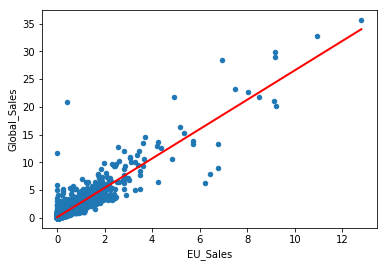

In [52]:
X_new = pd.DataFrame({'EU_Sales': [data.EU_Sales.min(), data.EU_Sales.max()]})
# data
data.plot(kind='scatter', x='EU_Sales', y='Global_Sales')
# Regresion
plt.plot(X_new, lm.predict(X_new), c='red', linewidth=2)

In [53]:
lm.conf_int()

,0,1
Intercept,0.13171,0.170138
EU_Sales,2.61327,2.672279


In [54]:
lm.rsquared

0.84427777291691664

Pomocou R<sup>2</sup> koeficientu je možné zistiť,<br>
na koľko je presná regresia. Respektíve, je to štatistická metrika,<br>
zobrazujúca, ako sú dáta blízko k regresnej funkcii.<br>
Podľa predajov z Európy je možné predikovať globálne predaje s presnesťou <b>88%</b>.

## Evaluate model - scikit

In [79]:
d = get_filtered_data(raw_data)
X = d.drop('Global_Sales', axis = 1)
lm = LinearRegression()

lm.fit(X, d.Global_Sales)

# d.DataFrame(zip(X.columns, lm.coef_), columns = ['feautures', 'est. coeficient'])
mse = np.mean((d.Global_Sales - lm.predict(X))**2)
print(mse)

ValueError: could not convert string to float: T

## Linear Regression - added variables

In [12]:
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',
          'Puzzle', 'Misc','Shooter', 'Simulation', 'Action',
          'Fighting', 'Adventure','Strategy']

In [56]:
lm = smf.ols(formula='Global_Sales ~ EU_Sales + Decade + Sequel + Sports + Platform + Racing + Puzzle + Misc + Shooter + Simulation + Action + Fighting + Adventure + Strategy', data=data).fit()
lm.params

Intercept     36.439830
EU_Sales       2.764904
Decade        -0.018072
Sequel         0.017649
Sports        -0.188938
Platform      -0.013175
Racing        -0.250861
Puzzle        -0.142282
Misc          -0.155795
Shooter       -0.152718
Simulation    -0.210778
Action        -0.157631
Fighting      -0.117564
Adventure     -0.210028
Strategy      -0.232949
dtype: float64

In [57]:
lm.rsquared

0.82083842461591039

In [60]:
lm.pvalues

Intercept     1.826892e-119
EU_Sales       0.000000e+00
Decade        8.940987e-118
Sequel         1.287731e-01
Sports         3.282351e-18
Platform       6.280969e-01
Racing         1.675797e-24
Puzzle         4.094702e-06
Misc           3.558453e-12
Shooter        2.499878e-10
Simulation     4.904060e-15
Action         1.590740e-15
Fighting       1.992230e-05
Adventure      5.121797e-19
Strategy       1.035464e-15
dtype: float64

In [64]:
data.groupby(['Genre','Decade']).mean()

Platform  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
Genre        Decade                                                            
Action       1980         0.0      1982.783784  0.604459  0.073243  0.125946   
             1990         0.0      1997.725962  0.420481  0.242644  0.107356   
             2000         0.0      2006.376368  0.280306  0.142965  0.036149   
             2010         0.0      2013.443165  0.172814  0.149375  0.047322   
Adventure    1980         0.0      1983.333333  1.260000  0.200000  0.536667   
             1990         0.0      1997.165217  0.155043  0.120609  0.125565   
             2000         0.0      2007.425606  0.079585  0.040681  0.028662   
             2010         0.0      2013.393509  0.031724  0.029797  0.026369   
Fighting     1980         0.0      1984.200000  0.792000  0.144000  0.584000   
             1990         0.0      1996.716216  0.296892  0.135631  0.191532   
             2000         0.0      2005.823779  0.259214  0.113248  0.063355   
             2010         0.0      2012.957831  0.193795  0.099819  0.075904   
Misc         1980         0.0      1982.250000  0.418750  0.025000  0.607500   
             1990         0.0      1997.145985  0.278029  0.135766  0.142409   
             2000         0.0      2007.059809  0.236093  0.123038  0.052687   
             2010         0.0      2012.595642  0.174662  0.100362  0.044058   
Platform     1980         1.0      1985.305556  2.457778  0.478611  1.020278   
             1990         1.0      1996.659864  0.727619  0.320476  0.280748   
             2000         1.0      2004.935154  0.361655  0.180922  0.069454   
             2010         1.0      2013.083969  0.301298  0.240534  0.096718   
Puzzle       1980         0.0      1984.500000  1.990833  0.262083  0.600000   
             1990         0.0      1996.512195  0.145000  0.057805  0.232683   
             2000         0.0      2006.920375  0.142014  0.082998  0.049157   
             2010         0.0      2011.951220  0.034512  0.045732  0.035610   
Racing       1980         0.0      1984.000000  0.873333  0.215833  0.430833   
             1990         0.0      1997.822222  0.381333  0.206756  0.110533   
             2000         0.0      2005.324324  0.271022  0.171704  0.024771   
             2010         0.0      2012.823834  0.173144  0.218402  0.029485   
Role-Playing 1980         0.0      1988.090909  0.103636  0.000000  1.554545   
             1990         0.0      1996.804020  0.270352  0.184724  0.554673   
             2000         0.0      2006.405437  0.226950  0.105946  0.175189   
             2010         0.0      2013.376278  0.183640  0.137260  0.168364   
Shooter      1980         0.0      1982.906250  1.690937  0.094687  0.165625   
             1990         0.0      1996.759494  0.270633  0.125633  0.065190   
             2000         0.0      2005.848225  0.368311  0.179425  0.013745   
             2010         0.0      2013.032258  0.591316  0.445468  0.035643   
Simulation   1980         0.0      1986.000000  0.220000  0.060000  0.120000   
             1990         0.0      1997.128713  0.182871  0.090891  0.240297   
             2000         0.0      2007.042042  0.221201  0.126907  0.041306   
             2010         0.0      2012.803922  0.104026  0.136364  0.077013   
Sports       1980         0.0      1985.035714  0.430357  0.111071  0.695714   
             1990         0.0      1997.427083  0.244635  0.101562  0.120052   
             2000         0.0      2005.962240  0.295853  0.154865  0.037105   
             2010         0.0      2013.068966  0.276413  0.225971  0.027666   
Strategy     1990         0.0      1997.265734  0.174126  0.092937  0.177413   
             2000         0.0      2006.511062  0.080354  0.053053  0.042611   
             2010         0.0      2012.884892  0.055468  0.060360  0.037698   

                     Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
Genre        Decade   